In [15]:
import cv2
import PIL
import numpy as np
import tensorflow as tf

from PIL import Image

# convert tenfsor data to image array
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return Image.fromarray(tensor)

# resize image array and padding
def resize_and_pad(image_array, target_size=[224, 224]):
    image = tf.image.resize_with_pad(image_array, # image array
                                     target_height=target_size[0], target_width=target_size[1]) # image size target
    image = tensor_to_image(image)
    return image

# resize image with and padding
def crop_and_pad(image_path, target_size=[224, 224]):
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
#     image = Image.open(image_path)
#     image = crop_image(image, *box) # crop with bbox
    image = resize_and_pad(image / 255, target_size)
    return image

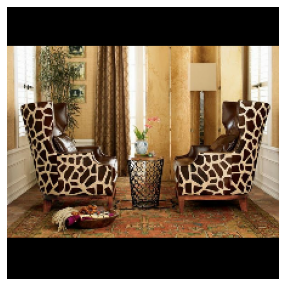

In [16]:
image = crop_and_pad('./1_datasets/original_dataset/new/ArtDecor/4-Interior-Decoration_ew.jpg')
# image = Image.open("./1_datasets/original_dataset/new/ArtDecor/4-Interior-Decoration_ew.jpg")
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.axis('off')
plt.imshow(image)
plt.show()

In [67]:
import os
from shutil import copyfile

src_dir = './1_datasets/original_dataset/'
des_dir = './1_datasets/try_padding_dataset/original/'
labels = os.listdir('./1_datasets/original_dataset/train/')
labels.sort()


max_pad = 3

for folder in os.listdir(src_dir):
    folder_dir = os.path.join(src_dir, folder)
    #
    for label in os.listdir(folder_dir):
        num = 1
        label_dir = os.path.join(folder_dir, label)
        #
        for image_name in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_name)
            image = Image.open(image_path)
            ratio = max(image.size)/min(image.size)
            if(ratio > 1.75):
                ori_name = image_name
#                 new_name = '{}_{}{}'.format(label, (str(num)).zfill(max_pad), os.path.splitext(image_name)[1])
#                 print('File copy: {} => {}'.format(ori_name, new_name))
                src = image_path
                if(not os.path.exists(os.path.join(des_dir, folder, label))):
                    os.mkdir(os.path.join(des_dir, folder, label))
                des = os.path.join(des_dir, folder, label, image_name)
                
                # Copy file
                copyfile(src, des)
                num += 1
                #